In [2]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
pwd

'C:\\Users\\home\\Documents\\project_3'

In [3]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('vic-sales-precovid.csv')
df.columns

Index(['Unnamed: 0', 'date_sold', 'price', 'suburb', 'city_name', 'state',
       'lat', 'lon', 'bedrooms', 'property_type', 'loc_pid', 'lga_pid',
       'Postcode'],
      dtype='object')

In [4]:
df.head()

,Unnamed: 0,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
0,0,2018-09-02,1123000.0,Elsternwick,Melbourne,VIC,-37.880265,145.002303,3,townhouse,VIC857,VIC89,3185.0
1,1,2018-09-02,460000.0,Rosebud,Melbourne,VIC,-38.389428,144.924085,3,house,VIC2199,VIC125,3939.0
2,2,2018-09-02,450000.0,Cheltenham,Melbourne,VIC,-37.964607,145.053552,2,unit,VIC537,VIC98,3192.0
3,3,2018-09-02,575000.0,Keysborough,Melbourne,VIC,-38.004906,145.165695,2,townhouse,VIC1334,VIC91,3173.0
4,4,2018-09-02,620000.0,Pakenham,Melbourne,VIC,-38.058174,145.454603,4,house,VIC2023,VIC161,3810.0


In [5]:
df['date_sold'] = pd.to_datetime(df['date_sold'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45705 entries, 0 to 45704
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     45705 non-null  int64         
 1   date_sold      45705 non-null  datetime64[ns]
 2   price          45705 non-null  float64       
 3   suburb         45705 non-null  object        
 4   city_name      45705 non-null  object        
 5   state          45705 non-null  object        
 6   lat            45705 non-null  float64       
 7   lon            45705 non-null  float64       
 8   bedrooms       45705 non-null  int64         
 9   property_type  45705 non-null  object        
 10  loc_pid        45705 non-null  object        
 11  lga_pid        45705 non-null  object        
 12  Postcode       45705 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 4.5+ MB


In [7]:
df['date_sold'][1]

Timestamp('2018-09-02 00:00:00')

In [16]:
df['date_sold'] = df['date_sold'].dt.year.astype(str) + df['date_sold'].dt.month.astype(str) + df['date_sold'].dt.day.astype(str)
# i = 0
# for d in df['date_sold']:
#     d = to_integer(d)
#     df['date_sold'][i] = d
# #     print(d)
#     i += 1
    

In [21]:
df['date_sold'] = df['date_sold'].astype(int)

In [22]:
df.head()

,Unnamed: 0,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,Postcode
0,0,201892,1123000.0,Elsternwick,Melbourne,VIC,-37.880265,145.002303,3,townhouse,VIC857,VIC89,3185.0
1,1,201892,460000.0,Rosebud,Melbourne,VIC,-38.389428,144.924085,3,house,VIC2199,VIC125,3939.0
2,2,201892,450000.0,Cheltenham,Melbourne,VIC,-37.964607,145.053552,2,unit,VIC537,VIC98,3192.0
3,3,201892,575000.0,Keysborough,Melbourne,VIC,-38.004906,145.165695,2,townhouse,VIC1334,VIC91,3173.0
4,4,201892,620000.0,Pakenham,Melbourne,VIC,-38.058174,145.454603,4,house,VIC2023,VIC161,3810.0


In [23]:
avg_price_by_date = df.groupby('date_sold').mean()['price']

In [24]:
avg_price_by_date.reset_index()

,date_sold,price
0,201892,8.542222e+05
1,201893,7.255628e+05
2,201894,8.781762e+05
3,201895,9.472395e+05
4,201896,8.731169e+05
...,...,...
494,20191227,6.706486e+05
495,20191228,6.740150e+05
496,20191229,1.150000e+06
497,20191230,6.547294e+05


In [25]:
data = pd.DataFrame(avg_price_by_date).reset_index()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_sold  499 non-null    int64  
 1   price      499 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [27]:
y = data['price'].values.reshape(-1, 1)

In [28]:
type(y)

numpy.ndarray

In [29]:
X = data.date_sold.values.reshape(-1, 1);
#X

In [37]:
data.head()

,date_sold,price
0,201892,854222.222222
1,201893,725562.788732
2,201894,878176.230769
3,201895,947239.500000
4,201896,873116.872340


In [30]:
type(X)

numpy.ndarray

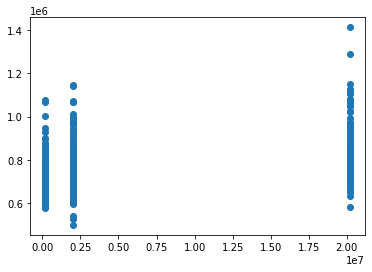

In [31]:
plt.scatter(X, y)


In [32]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

# YOUR CODE HERE
model = LinearRegression()
model

LinearRegression()

In [1]:
#X

In [33]:
model.fit(X, y)

LinearRegression()

In [34]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 


Weight coefficients:  [[0.00513718]]
y-axis intercept:  [730522.8154121]


In [143]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[20180902]]
Max X Value: [[20200131]]


In [144]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)
print(f"Min y Value: {y_min}")
print(f"Max y Value: {y_max}")

Min y Value: [[803065.57811263]]
Max y Value: [[704154.02086909]]


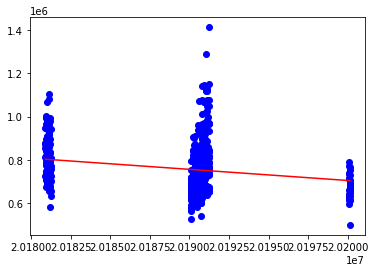

In [145]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [147]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

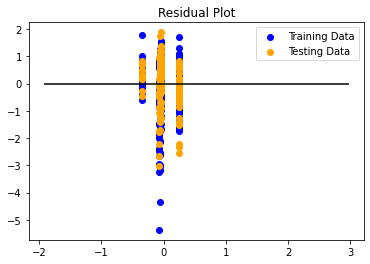

In [148]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [149]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8854829623480714, R2: 0.09438347145934112
